Автор материала: Зраев Артем.

Можно использовать в каких угодно целях.

<b> В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория</b>

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

- customerID           object
- gender               object
- SeniorCitizen         int64
- Partner              object
- Dependents           object
- tenure                int64
- PhoneService         object
- MultipleLines        object
- InternetService      object
- OnlineSecurity       object
- OnlineBackup         object
- DeviceProtection     object
- TechSupport          object
- StreamingTV          object
- StreamingMovies      object
- Contract             object
- PaperlessBilling     object
- PaymentMethod        object
- MonthlyCharges      float64
- TotalCharges         object
- Churn                object

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

In [2]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

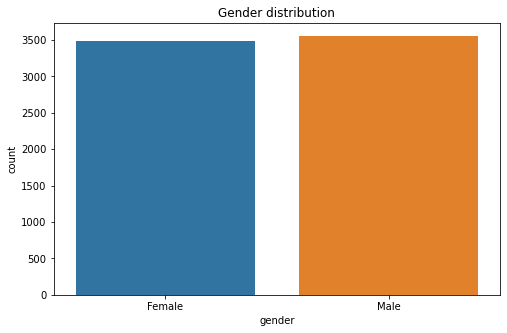

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 5))

sns.countplot(x=df['gender'], data=df)

plt.title('Gender distribution')
plt.show()

##### 2. Какое количество уникальных значений у поля InternetService?

In [4]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

In [5]:
df.loc[(df["TotalCharges"] == " "), "TotalCharges"] = None # Заменим значения "пробелов" на тип None для дальнейшей обработки

In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"]) # Перевод от строки к численному типу

In [7]:
len(df["TotalCharges"]) - df["TotalCharges"].count() # Подсчёт пропусков

11

In [8]:
#df.loc[(df['TotalCharges'].isna()), 'TotalCharges'] = df["TotalCharges"].median() # Замена пропусков медианой
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [9]:
len(df["TotalCharges"]) - df["TotalCharges"].count() # Убеждаемся, что пропусков нет

0

In [10]:
df["TotalCharges"].median() # Медиана

1397.475

In [11]:
df["TotalCharges"].mean() # Среднее значение

2281.9169281556187

In [12]:
df["TotalCharges"].std() # Стандартное отклонение

2265.2703984821865

В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

In [13]:
df["PhoneService"].unique() # Проверим все уникальные значения

array(['No', 'Yes'], dtype=object)

In [14]:
df['PhoneService'].value_counts() # Проверка количества значения признака

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [15]:
df.loc[(df["PhoneService"] == "Yes"), "PhoneService"] = 1 # Замена Yes на 0
df.loc[(df["PhoneService"] == "No"), "PhoneService"] = 0 # Замена No на 0
df["PhoneService"] = pd.to_numeric(df["PhoneService"]) # Перевод из строк в числа

In [16]:
df['PhoneService'].value_counts() # Проверка количества значения признака

1    6361
0     682
Name: PhoneService, dtype: int64

##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

In [17]:
#Всё это сделал в п.3, тк иначе не мог в числовой вид перевести. Только вместо 0 заполнил пропуски медианой

##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [18]:
df["Churn"].unique() # Проверим все уникальные значения

array(['No', 'Yes'], dtype=object)

In [19]:
df['Churn'].value_counts() # Проверка количества значения признака

No     5174
Yes    1869
Name: Churn, dtype: int64

In [20]:
df.loc[(df["Churn"] == "Yes"), "Churn"] = 1 # Замена Yes на 0
df.loc[(df["Churn"] == "No"), "Churn"] = 0 # Замена No на 0
df["Churn"] = pd.to_numeric(df["Churn"]) # Перевод из строк в числа

In [21]:
df['Churn'].value_counts() # Проверка количества значения признака

0    5174
1    1869
Name: Churn, dtype: int64

##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

In [22]:
column_names =["StreamingMovies", "StreamingTV", "TechSupport"]
for name in column_names:
    df.loc[(df[name] == "Yes"), name] = 1 
    df.loc[(df[name] == "No"), name] = 0
    df.loc[(df[name] == "No internet service"), name] = 0
    df[name] = pd.to_numeric(df[name]) 

##### 8. Заполните пропуски в поле PhoneService значением 0

In [23]:
len(df["PhoneService"]) - df["PhoneService"].count() # Таки где пропуски?

0

#### 8. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [24]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']
#Ваш код здесь
df = df[columns]
df.head(3)

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.85,0,0,0,0
1,Male,34,1,1889.50,0,0,0,0
2,Male,2,1,108.15,0,0,0,1


##### 9. Разделите датасет на тренировочную и тестовую выборку (подсказка - воспользуйтесь train_test_split из sklearn.model_selection. Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [25]:
from sklearn.model_selection import train_test_split

features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']
target = 'Churn'
#Ваш код здесь
from sklearn import model_selection
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)

##### 10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([
                ('selector', ColumnSelector(key='gender')),
                ('ohe', OHEEncoder(key='gender'))
            ])
# Так и не понял что тут надо делать, вроде как ответ уже был тут.....

##### 11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [27]:
#Ваш код здесь
gender.fit_transform(X_train)

,gender_Female,gender_Male
1576,1,0
5013,0,1
4077,1,0
3294,1,0
3459,1,0
...,...,...
6512,0,1
48,0,1
772,1,0
5944,0,1


##### 12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

In [28]:
from sklearn.preprocessing import StandardScaler

tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])
# Будет полезно в случае использования регуляризации в моделях линейной регрессии

##### 13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [29]:
#Ваш код здесь
TotalCharges =  Pipeline([
                ('selector', NumberSelector(key='TotalCharges')),
                ('standard', StandardScaler())
            ])

Объединение всех "кубиков" очень легко сделать таким образом

In [30]:
from sklearn.pipeline import FeatureUnion

number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies', 'StreamingTV', 
                                                 'TechSupport']))
            ])

In [31]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', TotalCharges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
          

##### 14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [33]:
#Ваш код здесь
pipeline.predict_proba(X_test)

array([[0.08, 0.92],
       [1.  , 0.  ],
       [0.85, 0.15],
       ...,
       [0.95, 0.05],
       [0.52, 0.48],
       [0.98, 0.02]])

##### 15. Посчитайте метрики качества получившейся модели (roc_auc, logloss)

In [34]:
from sklearn.metrics import roc_auc_score, log_loss

#Ваш код здесь
roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])

0.7669923806200197

In [35]:
log_loss(y_test, pipeline.predict_proba(X_test)[:, 1])

0.8998373625616289

### Сохраним наш пайплайн

In [36]:
#pip install dill

In [37]:
import dill
with open("model_RF.dill", "wb") as f:
    dill.dump(pipeline, f)